1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.
2) Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком.
3) Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?
4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?
5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?
Задание:
За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).
Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_excel('liljun.xlsx')
#data

In [14]:
# меняем тип данных в рецеивинг_дате
data['receiving_date'] = pd.to_datetime(data['receiving_date'], errors='coerce')
# столбец sum в числовой тип
data['sum'] = pd.to_numeric(data['sum'], errors='coerce')

C:\Users\1049 GOTHO\AppData\Local\Temp\ipykernel_42148\2257221422.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['receiving_date'] = pd.to_datetime(data['receiving_date'], errors='coerce')


In [16]:
paid_deals_july_2021 = data[(data['receiving_date'].dt.month == 7) & (data['receiving_date'].dt.year == 2021) & (data['status']=='ОПЛАЧЕНО') ]
paid_deals_july_2021
total_revenue = paid_deals_july_2021['sum'].sum()
print(f"Общая выручка за июль 2021 по непросроченным сделкам: {total_revenue:.2f}")

Общая выручка за июль 2021 по непросроченным сделкам: 757830.74


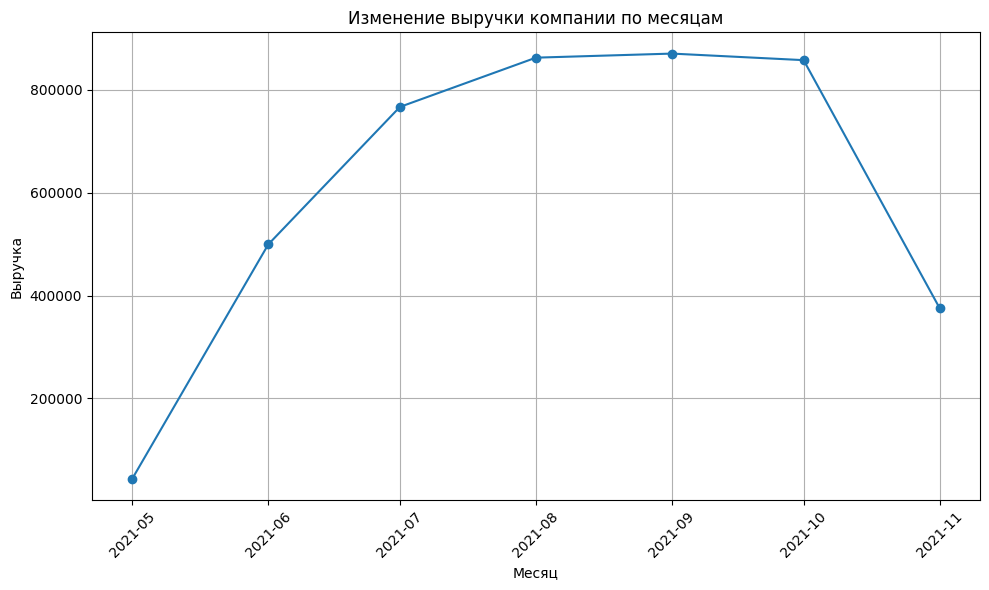

In [17]:
# групбаем по периодам
data['month'] = data['receiving_date'].dt.to_period('M')  # делаем что то типа корзин чтобы получился график линией
monthly_revenue = data.groupby('month')['sum'].sum().reset_index()

# Преобразование периода обратно в datetime для графика
monthly_revenue['month'] = monthly_revenue['month'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['month'], monthly_revenue['sum'], marker='o')
plt.title('Изменение выручки компании по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [18]:
# сентябрь 2021
september_2021 = data[(data['receiving_date'].dt.month == 9) & (data['receiving_date'].dt.year == 2021)]

# групбаем по менеджеру и сумируем сум
manager_revenue = september_2021.groupby('sale')['sum'].sum().reset_index()

# Определение менеджера с максимальной выручкой
top_manager = manager_revenue.loc[manager_revenue['sum'].idxmax()]

print(f"Менеджер, привлекший больше всего денежных средств в сентябре 2021: {top_manager['sale']}, сумма: {top_manager['sum']:.2f}")

Менеджер, привлекший больше всего денежных средств в сентябре 2021: Петрова, сумма: 219240.12


In [19]:
# фильтурем октябрь 2021
october_2021 = data[(data['receiving_date'].dt.month == 10) & (data['receiving_date'].dt.year == 2021)]

# Подсчет количества сделок по типам
deal_counts = october_2021['new/current'].value_counts()

# Определение преобладающего типа сделок
dominant_deal_type = deal_counts.idxmax()
dominant_deal_count = deal_counts.max()

print(f"Преобладающий тип сделок в октябре 2021: {dominant_deal_type}, количество сделок: {dominant_deal_count}")

Преобладающий тип сделок в октябре 2021: текущая, количество сделок: 105


In [39]:
# фильтурем май 2021
may_2021 = data[(data['receiving_date'].dt.month == 5) & (data['receiving_date'].dt.year == 2021)]

# количество оригиналов
original_count = len(may_2021)

print(f"Количество оригиналов договора по майским сделкам, полученных в июне 2021: {original_count}")

Количество оригиналов договора по майским сделкам, полученных в июне 2021: 4


In [20]:
# Фильтрация данных по сделкам до 01.07.2021
filtered_data = data[data['receiving_date'] < '2021-07-01']

# Инициализация словаря для хранения бонусов
bonus_dict = {}

# Расчет бонусов
for index, row in filtered_data.iterrows():
    manager = row['sale']
    deal_type = row['new/current']
    amount = row['sum']
    status = row['status']
    document = row['document']

    # Проверка условий для новых сделок
    if deal_type == 'новая' and status == 'ОПЛАЧЕНО' and document == 'оригинал':
        bonus = amount * 0.07
    # Проверка условий для текущих сделок
    elif deal_type == 'текущая' and document == 'оригинал':
        if amount > 10000:
            bonus = amount * 0.05
        else:
            bonus = amount * 0.03
    else:
        continue  # Пропустить, если условия не выполнены

    # Суммирование бонусов для каждого менеджера
    if manager in bonus_dict:
        bonus_dict[manager] += bonus
    else:
        bonus_dict[manager] = bonus

# Вывод остатка для каждого менеджера
print("Остаток каждого менеджера на 01.07.2021:")
for manager, bonus in bonus_dict.items():
    print(f"{manager}: {bonus:.2f}")

Остаток каждого менеджера на 01.07.2021:
Иванов: 2503.84
Андреев: 4798.20
Филимонова: 409.68
Петрова: 7028.80
Смирнов: 4078.72
Селиванов: 353.32
Кузнецова: 2604.67
Васильев: 339.23


In [ ]:
можно конечно подумать как обойтись без цикла ибо циклы - медленно